# Auditory Sound Processing - Part IIb: Effect of Windowing

author: Thomas Haslwanter\
date: April-2020

This notebook gives an example of windowing, showing that:
* selection of a narrower time-window widens the frequncy spectrum
* application of a *window function* eliminates ripples in the frequency spectrum

## Function definitions

In [1]:
# Standard packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def powerSpect(data, sampleRate):
    '''Powerspectrum, calculated via Fourier Transfrom'''
    
    nData = len(data)
    fftData = np.fft.fft(data)
    
    Pxx = np.real(fftData * fftData.conj()) / nData
    freq = np.arange(nData)*sampleRate / nData
    
    return (Pxx, freq)
    
def showData(samplingRate, x, titleText):
    '''Show data in time domain, and corresponding powerspectrum'''
    
    t = np.arange(len(x)) / samplingRate
        
    fig, axs = plt.subplots(2,1)
    axs[0].plot(t,x)
    axs[0].set_xlabel('Time [s]')
    axs[0].set_ylabel('Signal')
    axs[0].set_title(titleText)
    
    # Calculate the powerspectrum
    (Pxx, freq) = powerSpect(x, samplingRate)
    
    axs[1].plot(freq, Pxx, 'o-')
    axs[1].set_xlim(1, 5000)
    axs[1].set_xlabel('Frequency [Hz]')
    axs[1].set_ylabel('Power')

## Create a Sine Wave

In [2]:
# Set the parameters
sampleRate = 100000
dt = 1./sampleRate
f = 1000
tMax = 0.01

# Calculate the data
t = np.arange(0, tMax, dt)
x = np.sin(2*np.pi*f*t)

## 1) Original Data, 2) Clipped Data, and 3) Clipped & Windowed Data

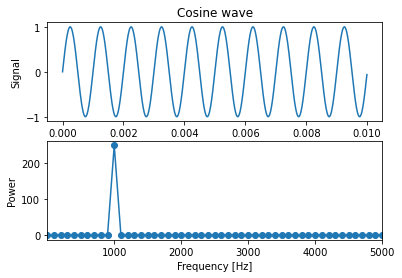

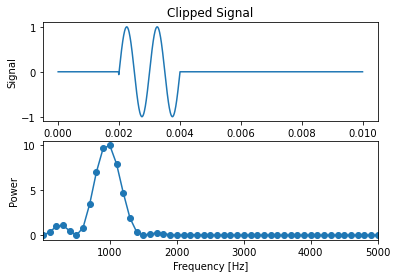

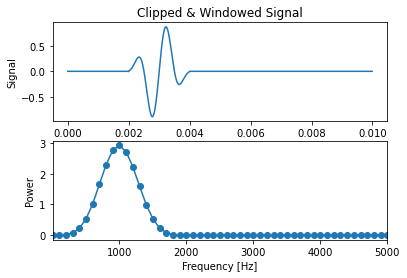

In [3]:
showData(sampleRate, x, 'Cosine wave')

# Clip the data
y = x
y[1:199] = 0
y[400:1001] = 0
showData(sampleRate, y, 'Clipped Signal')

# Window the clipped data
z = y;
window = np.hamming(201)
z[199:400] = z[199:400]*window
showData(sampleRate, z, 'Clipped & Windowed Signal')

[9_Soundproc_TimeDependence](9_Soundproc_TimeDependence.ipynb)<img src="data\images\Forward_Backward.png" align='middle'>[10_ControlSystems](10_ControlSystems.ipynb)